In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('../outAL123456.3.fasta_mean.csv')
# df = pd.read_csv('../outCP054306.1-ref.fasta_mean.csv')
# df = pd.read_csv('outCP059991.1-ref.fasta_mean.csv')
# df = pd.read_csv('outNC_000911.1-ref.fasta_mean.csv')
# df = pd.read_csv('outNC_004368.1-ref.fasta_mean.csv')
df.head()

,SampleName,probability_binary,probability_ENAC,probability_PS2,probability_NCP,probability_mean
0,1_AL123456.3_0_101_+,0.086559,0.054525,0.074421,0.048471,0.065994
1,1_AL123456.3_0_101_-,0.046527,0.032567,0.076541,0.041068,0.049176
2,2_AL123456.3_3_104_+,0.129945,0.077992,0.175931,0.113607,0.124369
3,2_AL123456.3_3_104_-,0.083823,0.024925,0.054047,0.036128,0.049731
4,3_AL123456.3_6_107_+,0.136982,0.102577,0.154038,0.136196,0.132448


<AxesSubplot: >

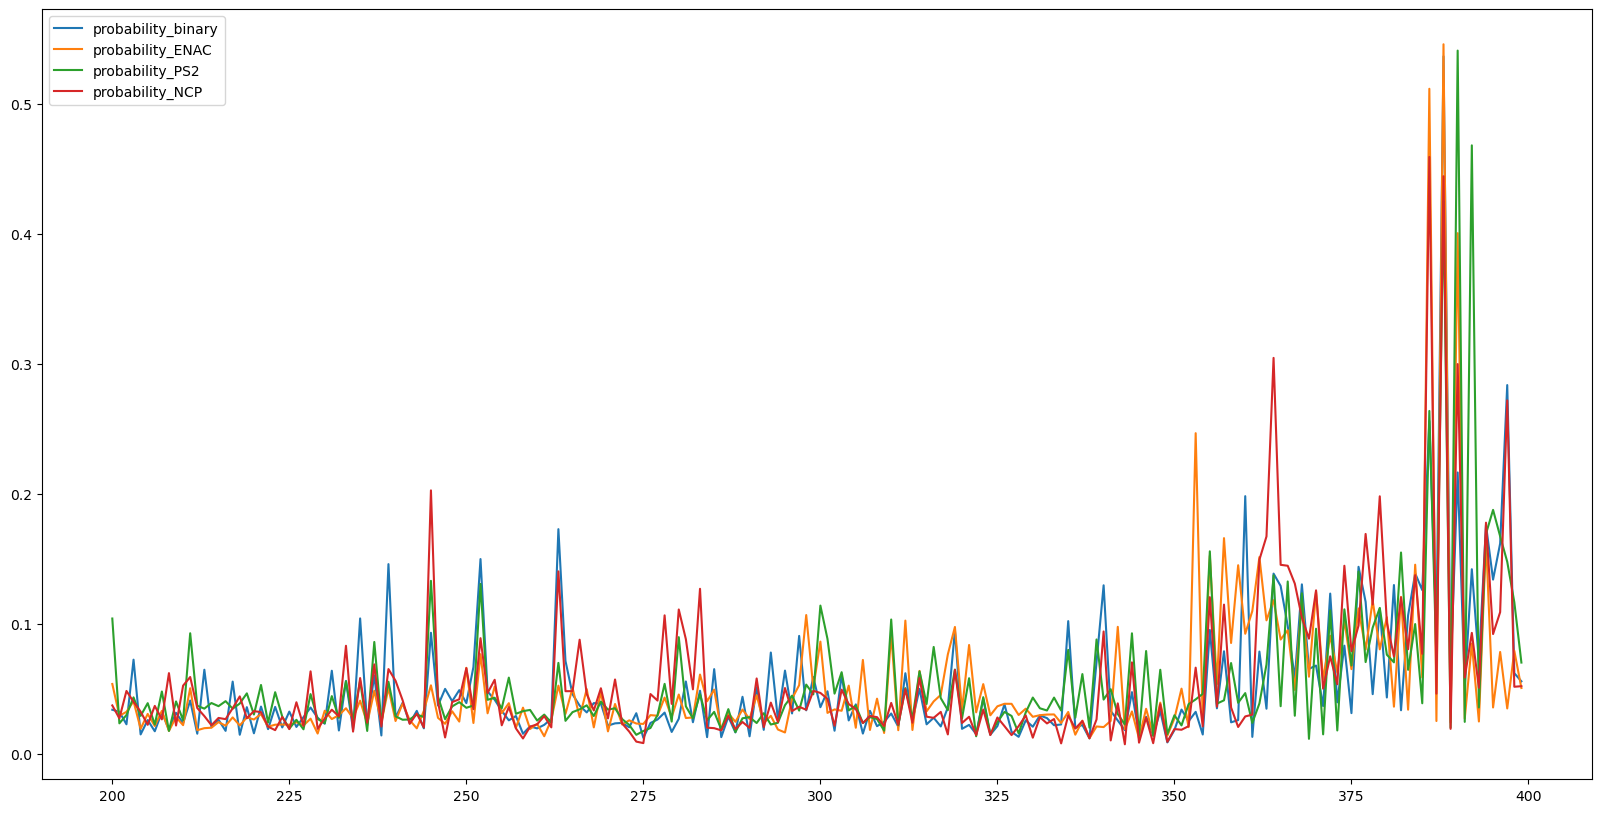

In [63]:
df[df.columns[1:-1]].iloc[200:400].plot(figsize=(20,10))

In [64]:
# Replace NC_0 with NC0
df['SampleName'] = df['SampleName'].str.replace('NC_0', 'NC0')
df['start'] = df['SampleName'].str.split('_').str[2].astype(int)
df['end'] = df['SampleName'].str.split('_').str[3].astype(int)
df['strand'] = df['SampleName'].str.split('_').str[4]
df['chrom'] = df['SampleName'].str.split('_').str[1]
df['chrom'] = df['chrom'].str.replace('NC0', 'NC_0')
df['name'] = 'bactermfinder'
df['score'] = df['probability_mean']

df = df[['chrom', 'start', 'end', 'name', 'score', 'strand']]
# df.head()
df

,chrom,start,end,name,score,strand
0,AL123456.3,0,101,bactermfinder,0.065994,+
1,AL123456.3,0,101,bactermfinder,0.049176,-
2,AL123456.3,3,104,bactermfinder,0.124369,+
3,AL123456.3,3,104,bactermfinder,0.049731,-
4,AL123456.3,6,107,bactermfinder,0.132448,+
...,...,...,...,...,...,...
2940951,AL123456.3,4411425,4411526,bactermfinder,0.076810,-
2940952,AL123456.3,4411428,4411529,bactermfinder,0.029057,+
2940953,AL123456.3,4411428,4411529,bactermfinder,0.093311,-
2940954,AL123456.3,4411431,4411532,bactermfinder,0.031749,+


In [65]:
df[df['score']>0.46].shape

(8077, 6)

In [66]:
# read the gff file
gff = pd.read_csv('/home/amin/Desktop/TermFinder/Code/test_results/end_of_gene/gffs/AL123456.3_gene.gff', sep='\t', comment='#', header=None)

gff = gff[[0, 3, 4, 6, ]]

# add a new col for 0.5 value for all of the rows , if the genes are overlapping, add 0.1 to the score
gff['score'] = 0.3

# overlapping means the start of the next gene is less than the end of the previous gene
gff['overlap'] = gff[3].shift(-1) < gff[4]

# if the gene is overlapping, add 0.1 to the score
gff.loc[gff['overlap'], 'score'] += 0.05

# drop the overlap col
gff.drop('overlap', axis=1, inplace=True)

gff

,0,3,4,6,score
0,AL123456.3,1,1524,+,0.30
1,AL123456.3,2052,3260,+,0.30
2,AL123456.3,3280,4437,+,0.35
3,AL123456.3,4434,4997,+,0.30
4,AL123456.3,5240,7267,+,0.30
...,...,...,...,...,...
4093,AL123456.3,4408334,4408897,-,0.30
4094,AL123456.3,4408969,4410069,-,0.35
4095,AL123456.3,4410053,4410415,-,0.35
4096,AL123456.3,4410412,4410789,-,0.35


13133


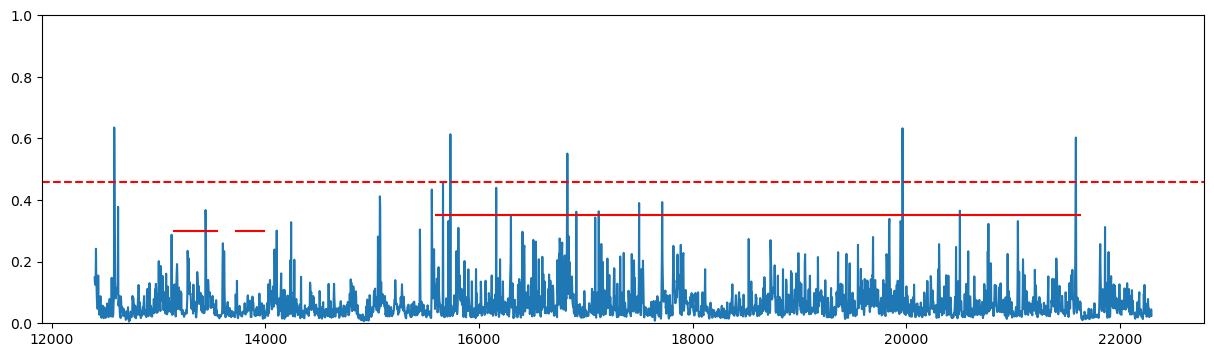

In [67]:
# create a function and a ipython widget to plot the data
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

def plot_data(chrom, position, zoom, strand):
    # if strand == True:
    #     strand = '+'
    # else:
    #     strand = '-'
    start = position - zoom
    end = position + zoom
    df_plot = df[(df['chrom'] == chrom) & (df['start'] > start) & (df['end'] < end) & (df['strand'] == strand)][['score', 'start']].copy()
    # smooth the data
    # df_plot['score'] = df_plot['score'].rolling(1).mean()
    # add gff genes as ruler on the same plot (with respect to the strand)
    gff_plot = gff[(gff[0] == chrom) & (gff[3] > start) & (gff[4] < end) & (gff[6] == strand)].copy()


    # plot the data
    plt.figure(figsize=(15,4))
    plt.ylim(0,1)
    plt.plot(df_plot['start'], df_plot['score'])     

    for i in range(gff_plot.shape[0]):
        val = gff_plot.iloc[i]['score']
        xmin = gff_plot.iloc[i][3]
        xmax = gff_plot.iloc[i][4]
        plt.hlines(y=val, xmin=xmin, xmax=xmax, color='r', linestyle='-') 
    
    print(min(gff_plot[3]))

    # add a vertical line at the position
    plt.axhline(y=0.46, color='r', linestyle='--')

    plt.show()

plot_data('AL123456.3', 12400+5000, 5000, '-')

In [68]:
%%html
<style>
    .widget-radio-box {
        flex-direction: row !important;     
    }
    .widget-radio-box label{
        margin:5px !important;
        width: 120px !important;
    }
</style>

In [69]:
zoom=widgets.IntText(min=0, max=1000000, step=100, value=3000, description='Zoom:')
position=widgets.IntText(min=0, max=1000000, step=zoom.get_interact_value()//3, value=1000, description='Position:')

interact(
    plot_data,
    chrom=widgets.Dropdown(options=df['chrom'].unique(),description='Chromosome:'),
    position=position, 
    zoom=zoom, 
    # strand is a radial button with + and - as options
    strand=widgets.RadioButtons(options=['+','-'],description='Strand'),
)
plt.show()

interactive(children=(Dropdown(description='Chromosome:', options=('AL123456.3',), value='AL123456.3'), IntTex…

In [70]:
# term_strand_n['score']*=-1
# term_strand_p['score']-=0.26
# term_strand_n['score']+=0.26

term_strand_n['score']*=-1
# term_strand_p['score']+=0.46
# term_strand_n['score']-=0.46



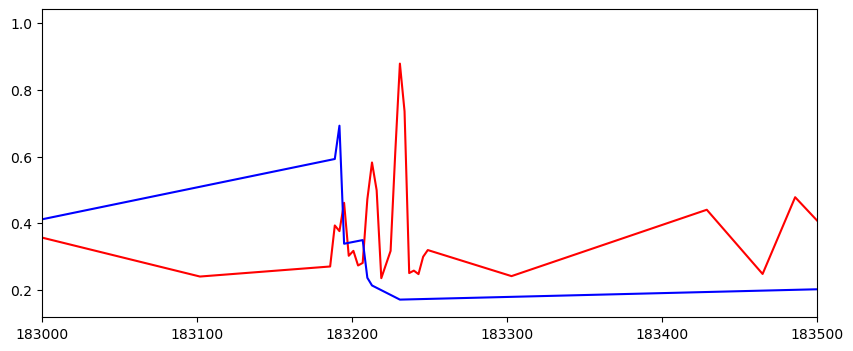

In [71]:

# plot the data
plt.figure(figsize=(10,4))
# plt.ylim(-1,1)
# plt.xlim(189800,190000)
plt.xlim(183000,183500)

plt.plot(term_strand_p['start'], term_strand_p['score'], 'r')
plt.plot(term_strand_n['start'], term_strand_n['score'], 'b')


In [72]:
term_strand_p = df[df['strand'] == '+'].reset_index(drop=True)
term_strand_p = term_strand_p[term_strand_p['score']>0.16].reset_index(drop=True)

term_strand_n = df[df['strand'] == '-'].reset_index(drop=True)
term_strand_n = term_strand_n[term_strand_n['score']>0.16].reset_index(drop=True)

# how many start positions are same in both strands
print ( f"out of {len(term_strand_n)+ len(term_strand_p)} terminators ",term_strand_p['start'].isin(term_strand_n['start']).sum(), " are same in both strands")

out of 125339 terminators  8375  are same in both strands


In [73]:
from itertools import groupby
from operator import itemgetter

df_t = df[df['score'] > 0.26]


In [74]:
df_t

,chrom,start,end,name,score,strand
32,AL123456.3,48,149,bactermfinder,0.276517,+
62,AL123456.3,93,194,bactermfinder,0.262037,+
66,AL123456.3,99,200,bactermfinder,0.467358,+
111,AL123456.3,165,266,bactermfinder,0.267003,-
134,AL123456.3,201,302,bactermfinder,0.408084,+
...,...,...,...,...,...,...
2940553,AL123456.3,4410828,4410929,bactermfinder,0.281719,-
2940702,AL123456.3,4411053,4411154,bactermfinder,0.308647,+
2940828,AL123456.3,4411242,4411343,bactermfinder,0.266981,+
2940857,AL123456.3,4411284,4411385,bactermfinder,0.393117,-


In [75]:

def get_ranges(data):
    ranges =[]    
    for k,g in groupby(enumerate(data),lambda x:x[0]-x[1]):
        group = (map(itemgetter(1),g))
        group = list(map(int,group))
        ranges.append((group[0],group[-1]))
    return ranges


ranges_fwd = df_t[df_t['strand'] == "+"]['end']
ranges_rev = df_t[df_t['strand'] == "-"]['end']
ranges_fwd = get_ranges(ranges_fwd)
ranges_rev = get_ranges(ranges_rev)

# if nt_ref numbers are closer than 10, merge them
for i in range(len(ranges_fwd)-1):
    if ranges_fwd[i+1][0] - ranges_fwd[i][1] <= 10:
        ranges_fwd[i+1] = (ranges_fwd[i][0], ranges_fwd[i+1][1])
        ranges_fwd[i] = (0,0)

for i in range(len(ranges_rev)-1):
    if ranges_rev[i+1][0] - ranges_rev[i][1] <= 10:
        ranges_rev[i+1] = (ranges_rev[i][0], ranges_rev[i+1][1])
        ranges_rev[i] = (0,0)

ranges_fwd = [x for x in ranges_fwd if x != (0,0)]
ranges_rev = [x for x in ranges_rev if x != (0,0)]


df_bed = pd.DataFrame(ranges_fwd, columns=['nt_ref', 'a'], dtype='int')
df_bed['Strand'] = '+'

df_bed_rev = pd.DataFrame(ranges_rev, columns=['nt_ref', 'a'], dtype='int')
df_bed_rev['Strand'] = '-'


In [76]:

df = pd.concat([df_bed, df_bed_rev], ignore_index=True)
df


,nt_ref,a,Strand
0,149,149,+
1,194,200,+
2,302,302,+
3,365,365,+
4,680,686,+
...,...,...,...
30936,4410107,4410110,-
30937,4410149,4410152,-
30938,4410881,4410881,-
30939,4410929,4410929,-


In [77]:
# how many of df has length more than 0
df = df[abs(df['nt_ref'] - df['a']) > 0]

In [78]:
df['ref_gene'] = 'AL123456.3'
# df['ref_gene'] = 'NC_000911.1'
# df['ref_gene'] = 'NC_004368.1'
# df['ref_gene'] = 'CP059991.1'
# df['ref_gene'] = 'CP054306.1'

df['start'] = (df['nt_ref']+df['a'])//2 -101 # nt_ref and a are the end of the gene.
# if df start is negative, make it 0
df.loc[df['start'] < 0, 'start'] = 0
df['end'] = (df['nt_ref']+df['a'])//2
df['name'] = 'bacermfinder'
df['score'] = 0
# df['Strand'] = df_clean['Strand']
df = df[["ref_gene", "start", "end", 'name', "score", "Strand"]]
df

/tmp/ipykernel_78619/1547084773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref_gene'] = 'AL123456.3'
/tmp/ipykernel_78619/1547084773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = (df['nt_ref']+df['a'])//2 -101 # nt_ref and a are the end of the gene.
/tmp/ipykernel_78619/1547084773.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,ref_gene,start,end,name,score,Strand
1,AL123456.3,96,197,bacermfinder,0,+
4,AL123456.3,582,683,bacermfinder,0,+
7,AL123456.3,933,1034,bacermfinder,0,+
9,AL123456.3,1092,1193,bacermfinder,0,+
17,AL123456.3,3118,3219,bacermfinder,0,+
...,...,...,...,...,...,...
30933,AL123456.3,4408882,4408983,bacermfinder,0,-
30934,AL123456.3,4408938,4409039,bacermfinder,0,-
30935,AL123456.3,4409116,4409217,bacermfinder,0,-
30936,AL123456.3,4410007,4410108,bacermfinder,0,-


In [36]:
# to csv

df.to_csv('/home/amin/Desktop/TermFinder/Code/test_results/y_pred/AL123456.3_f1_merged_only.bed', index=False, sep='\t', header=False)